# Convergence d'intégration par Monte Carlo dans une cellule IJK

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib widget

In [3]:
n_max = 60
n_iter = 20
start = 1
rang = list(range(start, n_max, 5))

def f(x, x0, n0):
    dist = np.dot((x - x0), n0)
    return float(dist)
    


In [4]:
mean_err = np.zeros(len(rang))
std_err = np.zeros(len(rang))
for iteration in range(n_iter):
    x0 = np.random.uniform(0,1,size=(1,3))
    theta = np.random.uniform(-np.pi, np.pi)
    phi = np.random.uniform(-np.pi/2.,np.pi/2)
    n0 = np.array([np.cos(phi)*np.cos(theta), 
                   np.cos(phi)*np.sin(theta),
                   np.sin(phi)])
    list_mean = np.zeros(len(rang))
    for ni, n in enumerate(rang):
        mean = 0.
        for k in range(n**3):
            x = np.random.uniform(0.,1.,(1,3))
            mean += max(f(x, x0, n0), 
        mean /= n**3
        list_mean[ni] = mean
    list_err = np.abs((list_mean - mean)/mean) * 100
    mean_err += list_err
#     max_err = np.maximum(max_err, list_err)
    std_err += list_err**2
#     ax.plot(range(start,n_max), list_err)
mean_err /= n_iter
std_err = np.sqrt(std_err / n_iter - mean_err**2)

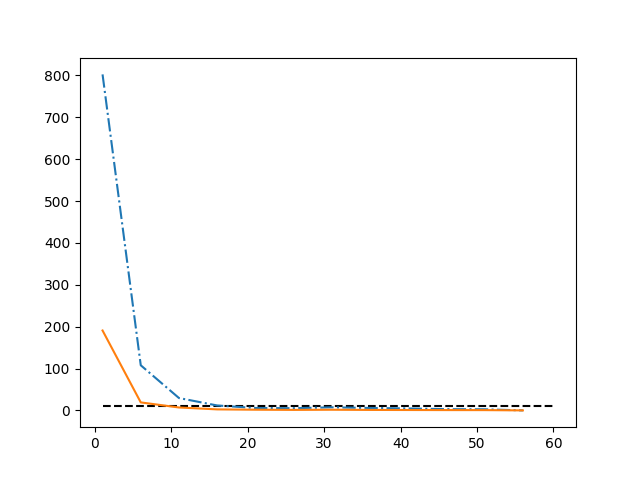

In [5]:
fig, ax = plt.subplots(1)
ax.plot([start, n_max], [10.]*2, '--k')
# ax.plot([start, n_max], [-10.]*2, '--k')
ax.plot(rang, mean_err + 3 * std_err, '-.')
# ax.plot(range(start,n_max), np.maximum(mean_err - 3 * std_err, np.zeros(n_max-start)), '-.')
ax.plot(rang, mean_err)
# ax.set_ylim(0., 100.)